# 1. Import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# our scripts
from src.semantic.perform_clustering import run_all_clustering_with_pca
from src.semantic.evaluate_clustering import calculate_clustering_consistency, get_primary_category, map_clustering_category

# 2. Calculate Semantic Distances for articles

## 2.1 Define file paths 

In [2]:
# Path to the category data file
category_file = './/data//original_dataset//wikispeedia_paths-and-graph//categories.tsv'

# All paths to the embedding data files
MiniLM_file = './/data//semantic//output//embeddings//MiniLM_L6_v2//embeddings.pkl' 
mpnet_file = './/data//semantic//output//embeddings//mpnet_base_v2//embeddings.pkl' 
roberta_file = './/data//semantic//output//embeddings//roberta//embeddings.pkl' 

## 2.2 Perform Clustering on embeddings

------Starting clustering for embeddings based on MiniLM_L6_v2...


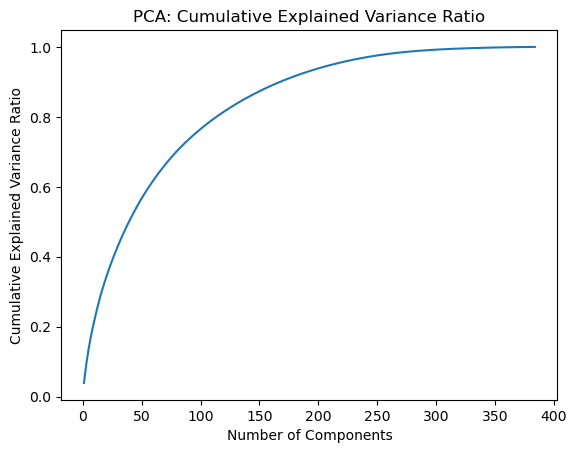

Number of components explaining 95.0% of variance: 213
Perform ['K-Means', 'K-Medoids with Manhattan', 'K-Medoids with Cosine', 'Spectral Clustering with NN'] successfully!
------Starting clustering for embeddings based on mpnet_base_v2...


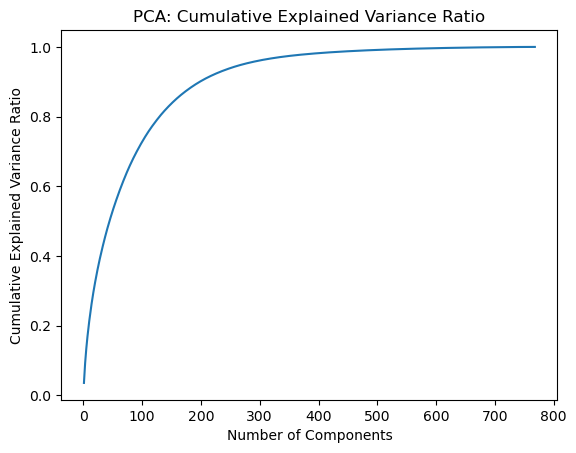

Number of components explaining 95.0% of variance: 272
Perform ['K-Means', 'K-Medoids with Manhattan', 'K-Medoids with Cosine', 'Spectral Clustering with NN'] successfully!
------Starting clustering for embeddings based on roberta...


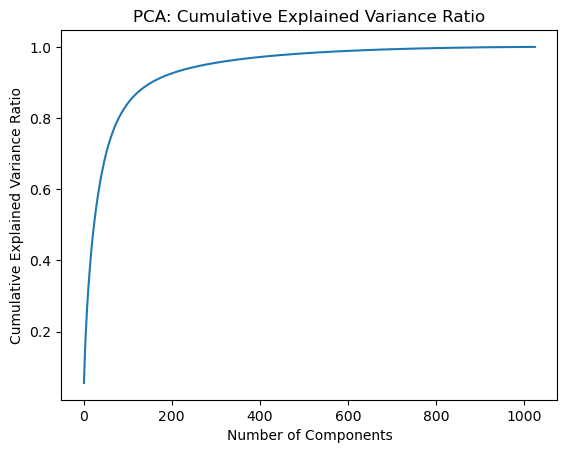

Number of components explaining 95.0% of variance: 276


In [ ]:
# For embeddings generated from MiniLM
print('------Starting clustering for embeddings based on MiniLM_L6_v2...')
MiniLM_clustering = run_all_clustering_with_pca(MiniLM_file, category_file)
print(f"Perform {list(MiniLM_clustering.keys())} successfully!")

# For embeddings generated from mpnet_base_v2
print('------Starting clustering for embeddings based on mpnet_base_v2...')
mpnet_clustering = run_all_clustering_with_pca(mpnet_file, category_file)
print(f"Perform {list(mpnet_clustering.keys())} successfully!")

# Cluster embeddings generated from roberta
print('------Starting clustering for embeddings based on roberta...')
roberta_clustering = run_all_clustering_with_pca(roberta_file, category_file)
print(f"Perform {list(roberta_clustering.keys())} successfully!")

The data structure of the clustering results is as follows:

- **MiniLM_clustering**
  - **K-Means**: Embeddings (DataFrame)
  - **K-Medoids Manhattan**: Embeddings (DataFrame)
  - **K-Medoids Cosine**: Embeddings (DataFrame)
  - **Spectral Clustering NN**: Embeddings (DataFrame)
  - **Spectral Clustering RBF**: Embeddings (DataFrame)

In [ ]:
# A sample of clustering results
MiniLM_clustering['K-Means'].head(5)

## 2.3 Evaluate the clustering results

### 2.3.1 Clustering Consistency

In [ ]:
# Extract clustering results from each DataFrame's 'clustering' column and store in a list
MiniLM_list = [df['clustering'].tolist() for df in MiniLM_clustering.values()]
mpnet_list = [df['clustering'].tolist() for df in mpnet_clustering.values()]
roberta_list = [df['clustering'].tolist() for df in roberta_clustering.values()]

# Calculate average clustering consistency for each embedding
MiniLM_ari, MiniLM_nmi = calculate_clustering_consistency(MiniLM_list)
mpnet_ari, mpnet_nmi = calculate_clustering_consistency(mpnet_list)
roberta_ari, MiniLM_nmi = calculate_clustering_consistency(roberta_list)

# Show the result 
clustering_consistency = pd.DataFrame({
    'Average ARI': [MiniLM_ari, mpnet_ari, roberta_ari],
    'Average NMI': [MiniLM_nmi, mpnet_nmi, MiniLM_nmi]
})
clustering_consistency.index = ['MiniLM', 'mpnet', 'roberta']

clustering_consistency

- **ARI** and **NMI** are two methods used to evaluate consistency across different clustering results.
- **Adjusted Rand Index (ARI):** ARI measures the similarity between two clustering results by considering pairs of points and evaluating how consistently they are grouped across different clusters. (Range: [-1, 1])
- **Normalized Mutual Information (NMI):** NMI evaluates the amount of shared information between two clustering results, assessing how well one clustering result predicts the other. (Range: [0, 1])
- **Embeddings generated by mpnet** shows the highest scores for both Average ARI (0.147835) and Average NMI (0.317228), indicating the best consistency and stability among the models.

### 2.3.2 Category-Cluster Mapping and Accuracy Evaluation

In [ ]:
# Get primary categories for concepts and show the head
primary_category = get_primary_category(category_file)
primary_category.head(5)

In [ ]:
# Set dicts to save the mapping results
MiniLM_evaluation = {}
mpnet_evaluation = {}
roberta_evaluation = {}

# evaluation on MiniLM_L6_v2
print("------Clustering accuracy for MiniLM_L6_v2 embeddings:")
for key, value in MiniLM_clustering.items():
    cluster_category_mapping, accuracy = map_clustering_category(primary_category, value)
    MiniLM_evaluation['key'] = cluster_category_mapping
    print(f"{key}: {accuracy:.2f}")

# evaluation on mpnet_base_v2
print("------Clustering accuracy for mpnet_base_v2 embeddings:")
for key, value in mpnet_clustering.items():
    cluster_category_mapping, accuracy = map_clustering_category(primary_category, value)
    mpnet_evaluation['key'] = cluster_category_mapping
    print(f"{key}: {accuracy:.2f}")

# evaluation on mpnet_base_v2
print("------Clustering accuracy for roberta embeddings:")
for key, value in roberta_clustering.items():
    cluster_category_mapping, accuracy = map_clustering_category(primary_category, value)
    roberta_evaluation['key'] = cluster_category_mapping
    print(f"{key}: {accuracy:.2f}")

- Among all embedding models, mpnet shows the highest degree of alignment with the original primary categories.